/Users/rix0rrr/Dev/CorrespondentPO/virtualenv/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Instellingen in analyse: 5902
onderwijssector


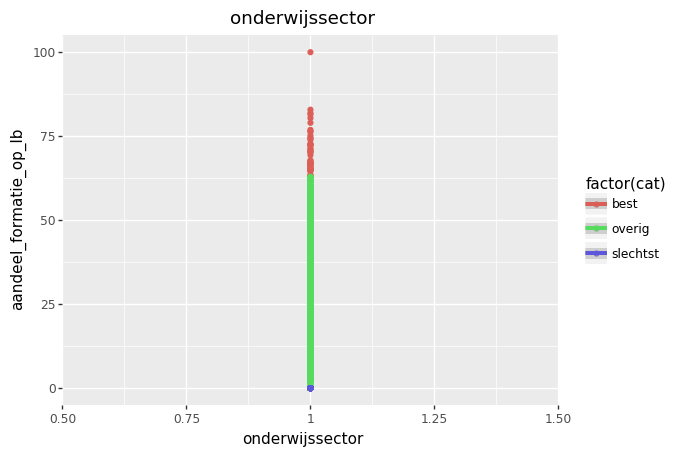

<ggplot: (287230514)>
year


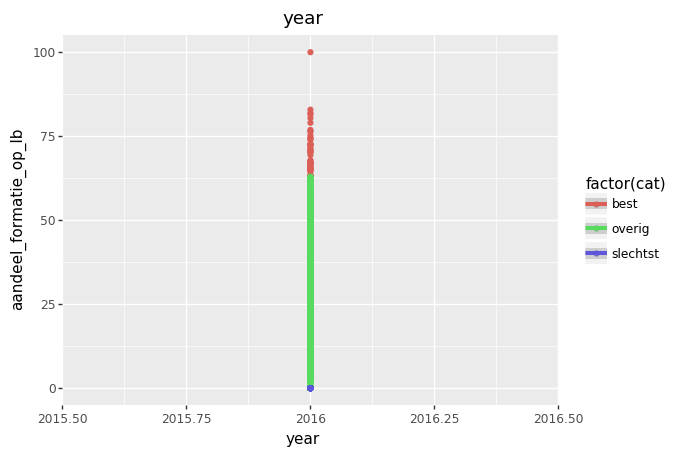

<ggplot: (-9223372036568461133)>
postcode_school


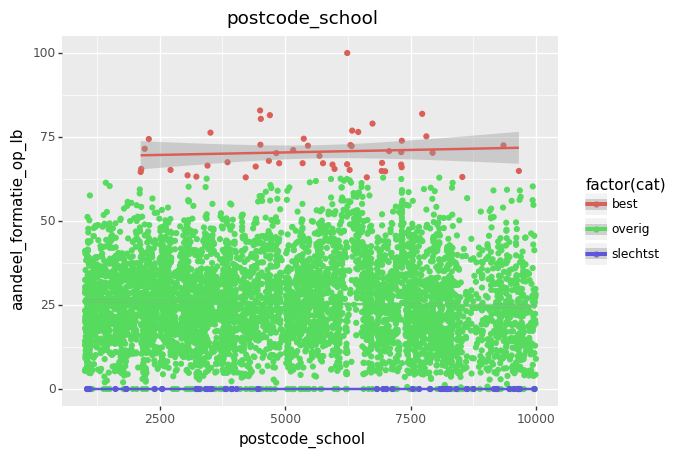

<ggplot: (-9223372036569254119)>
rpa_gebiedcode


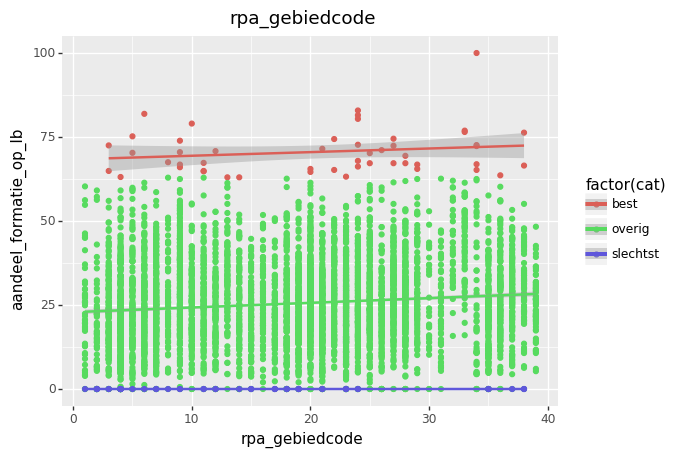

<ggplot: (287225306)>
randstad


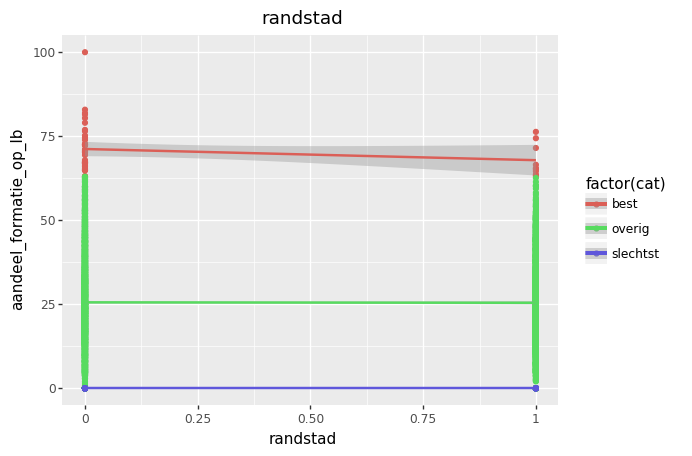

<ggplot: (285878462)>
gemeentenaam


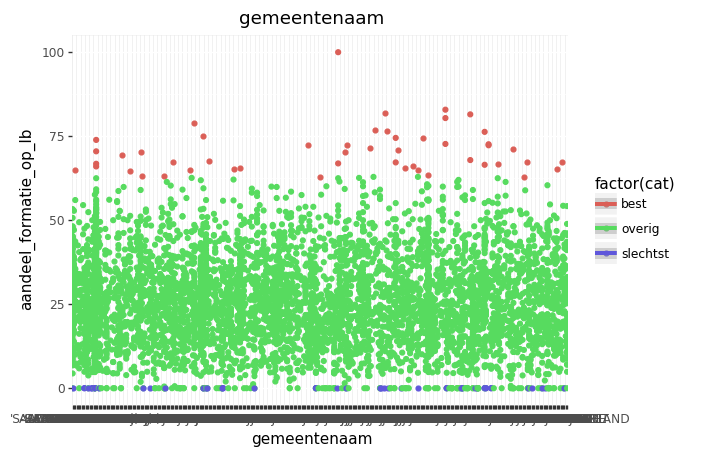

<ggplot: (-9223372036567486534)>
schooltype


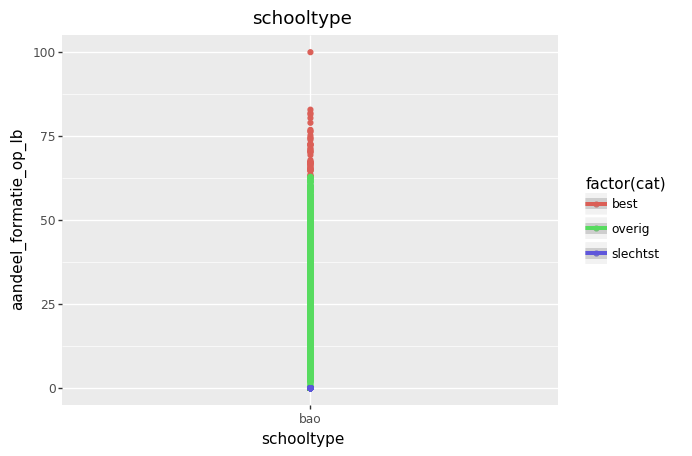

<ggplot: (-9223372036569251952)>
schoolsoort


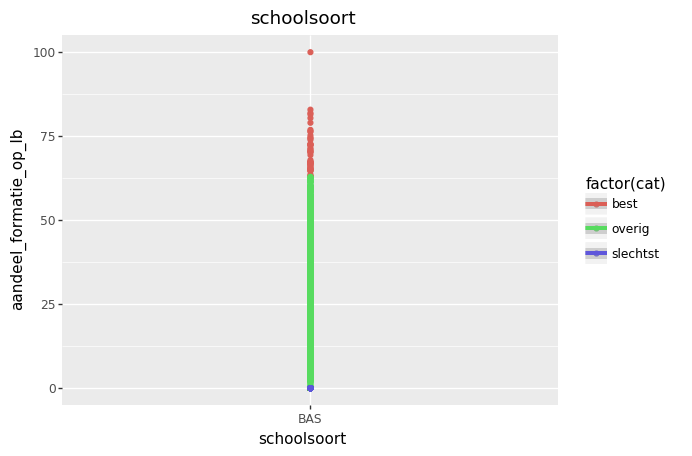

<ggplot: (286747940)>
verticale_scholengemeenschap


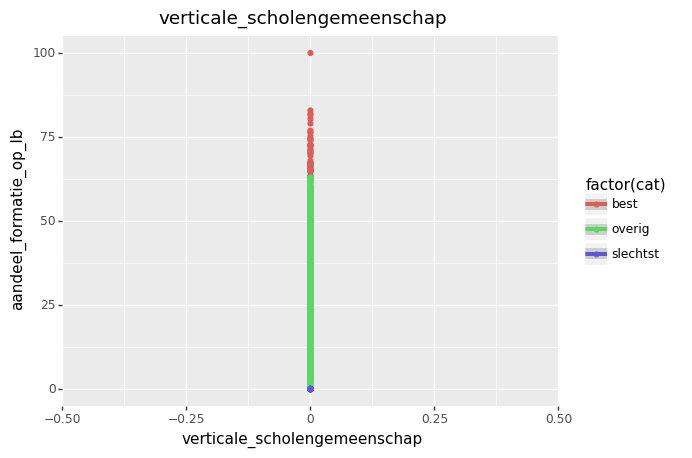

<ggplot: (-9223372036565884500)>
bevoegd_gezagnummer


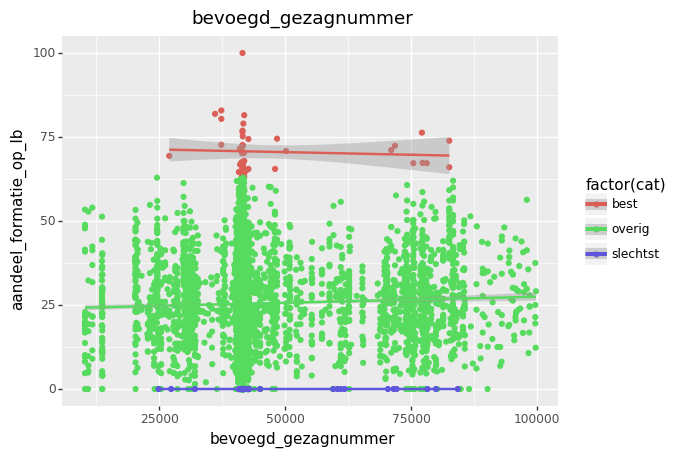

<ggplot: (285523709)>
postcode_bevoegd_gezag


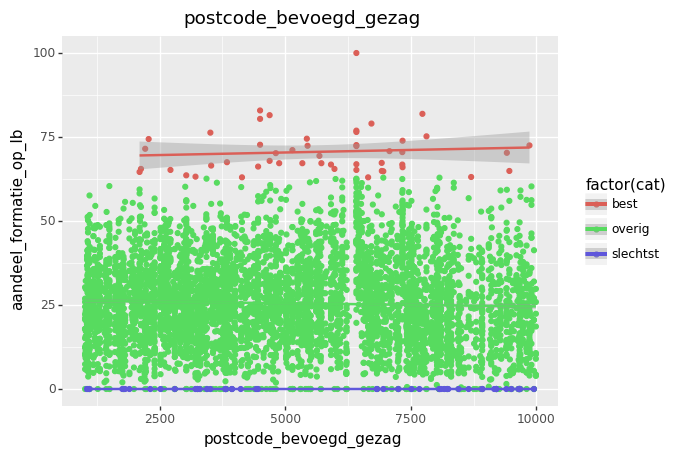

<ggplot: (289125026)>
eenpitter


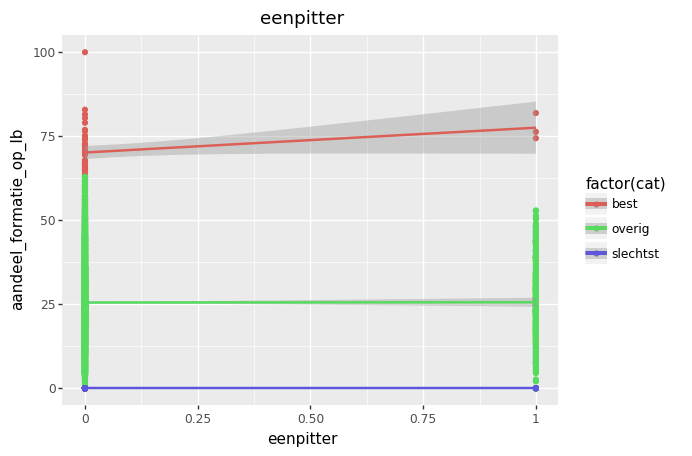

<ggplot: (-9223372036565650772)>
aantal_leerlingen


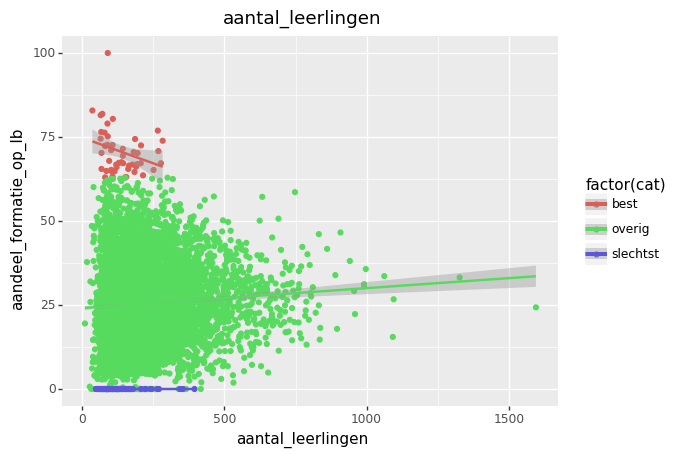

<ggplot: (289521928)>
categorie_schoolomvang


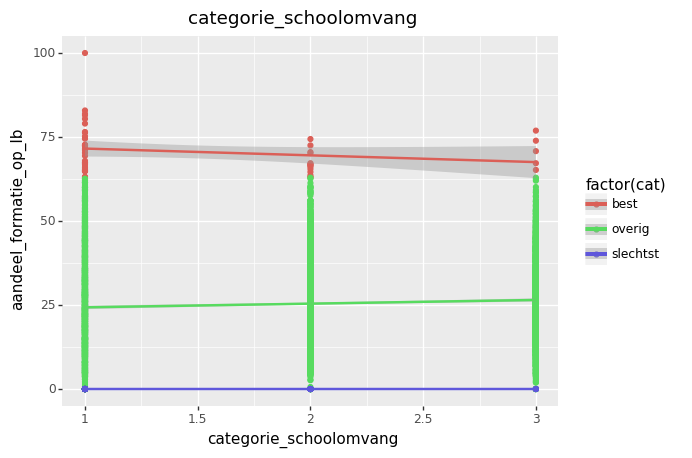

<ggplot: (289836762)>
aantal_gewichtleerlingen


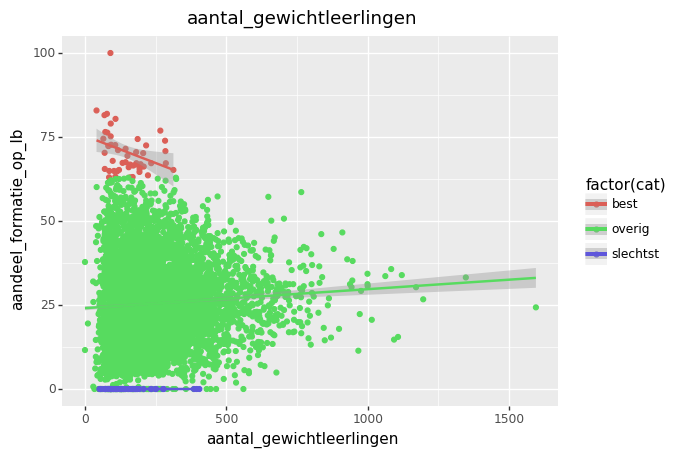

<ggplot: (-9223372036568573815)>
gemiddeld_leerlinggewicht


In [ ]:
%matplotlib inline
import pandas
from sklearn import linear_model as lm
from plotnine import *
import numpy as np
import math
import traceback

root = '/Users/rix0rrr/Google Drive/Hackathon 28_4'
filename = root + '/Team 3/Instellingsdata merged (Elmar)-no-blanks.csv'

#df = pandas.read_csv(filename, index_col='BEVOEGD_GEZAGNAAM', encoding='utf-8')
df = pandas.read_csv(filename, index_col='key', encoding='utf-8', low_memory=False, dtype={
    'aandeel_formatie_op_lb': np.float64
})

# joinert_cols = list(joinerts.columns.values)

# df = df.join(joinerts)

# for col in joinert_cols:
#     try:
#         df[col + ' per leerling'] = df[col] / df['AANTAL_LEERLINGEN']
#     except Exception as e:
#         print(e)
#         pass

# df = df.drop(joinert_cols, axis=1)

cols = list(df.columns.values)

# Ons jaar
df = df.loc[df['year'] == 2016]

# geen kleine scholen
df = df.loc[df['omvang_formatie_totaal'] >= 5]

# omvang besturen
#df = df.loc[df['Aantal instellingen'] >= 6]

print("Instellingen in analyse: %s" % len(df))

df = df.sort_values('aandeel_formatie_op_lb')
df.loc[:, 'cat'] = 'overig'
df.loc[:50, 'cat'] = 'slechtst'
df.loc[-50:, 'cat'] = 'best'

#print('De allerbeste is %s dus die doet niet meer mee' % df[-1:][['BEVOEGD_GEZAGNAAM', 'AANDEEL_FORMATIE_OP_LB']])
#df = df[:-1]
#cols = [c for c in cols if not c.startswith('AANDEEL_FORMATIE_')]

graphs = []

cols = [c for c in cols if c not in ['BRIN_NUMMER', 'instellingsnaam', 'bevoegd_gezagnaam'] ]

for x_as in cols:
    print(x_as)
    #x_as = 'SolvabiliteitI.2016'
    y_as = 'aandeel_formatie_op_lb'
    try:
        rows = df[[x_as, y_as, 'cat']].dropna()
        if not len(rows):
            print('NO NON-NA ROWS')
            continue
    
        print(ggplot(rows, aes(x_as, y_as, color='factor(cat)'))
         + ggtitle(x_as)
         + geom_point()
         + stat_smooth(method='lm'))
    except Exception as e:
        traceback.print_exc()
        print(e)
        pass
    
graphs